# California Housing Price

### **Contents**

1. Business Problem 
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# **Business Problem**


### **Latar Belakang**

Melansir dari [Wikipedia,](https://id.wikipedia.org/wiki/California) California merupakan negara bagian Amerika Serikat yang terpadat menurut kepadatan penduduk dan terbesar ketiga berdasarkan wilayah. California juga menjadi tempat impian untuk tinggal bagi banyak orang karena keindahan, pantai, dan status negara bagian itu yang dikenal sebagai salah satu ekonomi terbesar kelima di dunia. Bagi perusahaan di bidang properti tentunya hal tersebut dapat menjadi peluang yang sangat menguntungkan bagi bisnisnya. Walaupun bisnis properti di California memiliki peluang yang menjanjikan, namun terdapat hal yang sangat perlu untuk diperhatikan yaitu dalam penentuan harga properti. 

Biasanya dalam menentukan harga rumah dilakukan dengan cara membandingkan properti rumah yang ingin dijual dengan properti lain disekitar daerah tersebut dan terkadang harga yang dijual cenderung tinggi atau bisa saja terlalu rendah. Ketidakstabilan penentuan harga rumah ini sangat berisiko untuk agen properti karena akan berdampak terhadap penjualan. Jika harganya terlalu tinggi dibanding properti-properti lain dengan fitur sejenis di sekitar areanya, tentu akan terjadi penurunan penjualan. Sebaliknya, jika terlalu rendah, tentu penjual tidak akan mendapatkan profit yang sepadan. Banyak faktor yang dapat mempengaruhi harga rumah seperti lokasi, usia rumah, jumlah ruangan, jumlah kamar, populasi di sekitar lingkungan rumah, dan lain sebagainya yang perlu diperhatikan dalam menentukan harga rumah. 

### **Problem Satement**

Dalam menentukan harga rumah tidak cukup hanya dengan membandingkan harga dengan rumah-rumah yang ada di sekitarnya atau hanya dengan mengikuti harga pasar. Salah satu tantangan besar untuk sebuah perusahaan agen properti adalah memiliki bisnis yang dapat menguntungkan secara finansial bagi penjual rumah dan memberikan kepuasan bagi pembelinya. Semakin tingginya minat pembelian rumah di California, maka sangat penting untuk dapat menentukan harga rumah secara tepat agar kompetitif dengan harga jual rumah lainnya.  

### **Tujuan**

Berdasarkan permasalahan di atas, perusahaan agen properti memerlukan sebuah *"tool"* yang dapat membantu dalam memprediksi harga rumah dengan tepat. *Tool* ini dapat digunakan ketika seseorang ingin menjual rumahnya melalui agen properti sebagai perantara, kemudian *tool* tersebut digunakan untuk melakukan prediksi harga rumahnya berdasarkan faktor-faktor tertentu misalnya lokasi rumah, usia rumah, jumlah ruangan, jumlah kamar, populasi di sekitar lingkungan rumah, dan keadaan lingkungan rumah. 

Bagi perusahaan agen properti, *prediction tool* yang dapat memberikan prediksi harga rumah dengan tepat, tentu dapat meningkatkan jumlah penjualan nantinya.

### **Analytic Approach**

Jadi, yang perlu dilakukan dalam hal ini adalah:
* menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu rumah dengan yang lainnya. 
* membangun suatu model regresi yang akan membantu perusahaan agen pproperty untuk dapat menyediakan 'tool' prediksi harga rumah yang akan berguna bagi penjual dalam menentukan harga jual rumahnya.

### **Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah Mean Absolute Error (MAE) dan Mean Absolute Percentage Error (MAPE). MAE adalah rataan nilai absolut dari error untuk mengetahui rata rata selisih harga akurat dengan harga prediksi dalam bentuk US Dollar. 
Sedangkan MAPE adalah rataan persentase error yang digunakan untuk melihat berapa persentase rata-rata error antar nilai aktual dengan nilai prediksi. Semakin kecil nilai MAE dan MAPE yang dihasilkan, artinya model yang digunakan semakin akurat dalam memprediksi harga rumah di California sesuai dengan limitasi fitur yang digunakan. 

# **Data Understanding**

- Dataset berisikan data listing rumah-rumah yang ada di California berdasarkan sensus data tahun 1990.
- Setiap baris data merepresentasikan informasi terkait rumah-rumah di California.

**Attributes Information**

| **Nama Kolom** | **Tipe Data** | **Deskripsi** |
| --- | --- | --- |
| longtitude | Float | Longitude coordinates |
| latitude | Float | Latitude coordinates |
| housing_median_age | Float | Median age of house in a block |
| total_rooms | Float | Total rooms in a block |
| total_bedrooms | Float | Total bedrooms in a block |
| population | Float | Number of people residing in a block |
| households | Float | A group of people residing within a house for a block |
| median_income | Float | Median income for households in a block (USD) |
| ocean_proximity | Object | Location of the house |
| median_house_value | Float | Median house value for households in a block |

<br>

In [537]:
# Library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [538]:
# Dataset
df = pd.read_csv('data_california_house.csv')

In [539]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


### Exploratory Data analysis

In [540]:
# Jumlah perumahan beradasarkan kedekatan lokasinya dengan laut
print(f"Jumlah perumahan berdasarkan kedekatan lokasinya dengan laut:\n{df['ocean_proximity'].value_counts()}")

Jumlah perumahan berdasarkan kedekatan lokasinya dengan laut:
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64


Text(0.5, 1.0, 'Lokasi Perumahan Berdasarkan Jarak Kedekatan Dengan Laut')

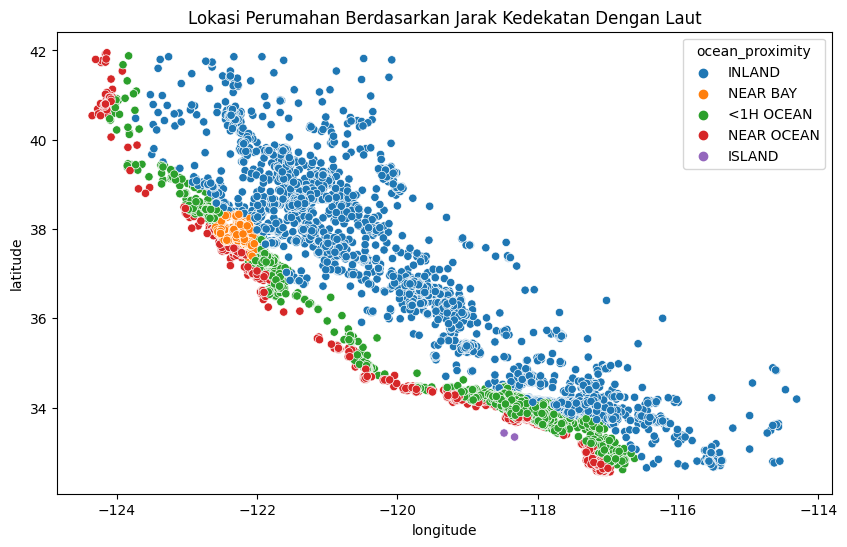

In [541]:
# Plot Perumahan berdasarkan kedekatan lokasinya dengan laut
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['longitude'], y = df['latitude'], hue=df['ocean_proximity']).set_title('Lokasi Perumahan Berdasarkan Jarak Kedekatan Dengan Laut')

Perumahan paling banyak terletak di lokasi yang memiliki waktu kurang dari 1 jam (<1H OCEAN) untuk menuju ke laut, kemudian diikuti oleh lokasi yang jauh dari lautan (INLAND). 

Text(0.5, 1.0, 'Harga perumahan berdasarkan lokasi')

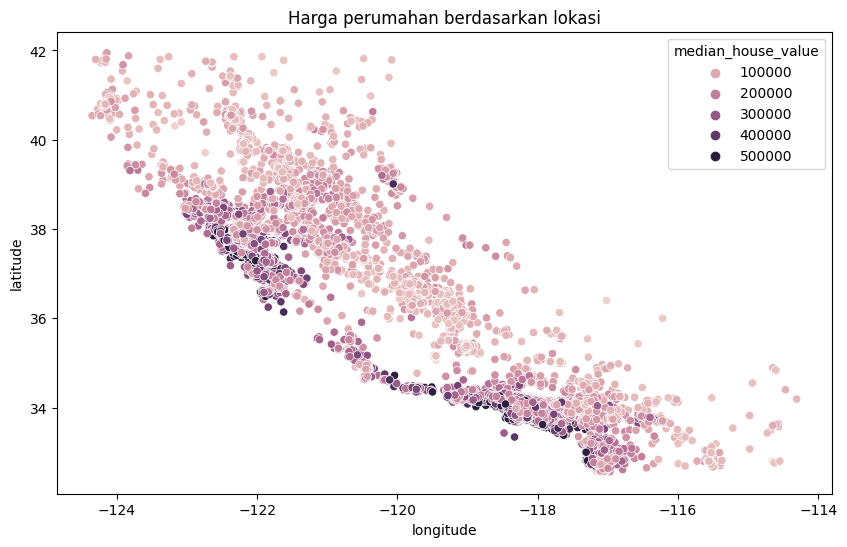

In [542]:
# Plot harga perumahan berdasarkan kedekatan lokasi dengan laut
plt.figure(figsize=(10, 6))
sns.scatterplot(x = df['longitude'], y = df['latitude'], hue=df['median_house_value']).set_title('Harga perumahan berdasarkan lokasi')

Perumahan yang memiliki harga cukup tinggi banyak terletak di lokasi dekat lautan, sedangkan perumahan yang lokasinya jauh dari laut cenderung lebih rendah harganya. 

## **Data Preprocessing**

Dalam tahapan ini, akan dilakukan *Data Cleaning* pada dataset. Setelah itu, data yang sudah dibersihkan akan digunakan untuk tahapan selanjutnya. Beberapa hal yang perlu dilakukan yaitu:
- Melakukan *Drop* pada fitur yang tidak relevan terhadap permasalahan yang akan diselesaikan.
- Melakukan treatment terhadap missing value jika ada dengan menggunakan metode yang paling baik berdasarkan permasalahannya.

Data yang akan digunakan dalam data preprocessing adalah hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [543]:
df_house = df.copy()

In [544]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [545]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_house.columns:
    listItem.append([col, df_house[col].dtype, df_house[col].isna().sum(), round((df_house[col].isna().sum()/len(df_house[col]))*100, 2),
                    df_house[col].nunique(), list(df_house[col].drop_duplicates().sample(2).values)]);

df_house_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_house_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-116.83, -120.92]"
1,latitude,float64,0,0.00,836,"[36.53, 35.02]"
2,housing_median_age,float64,0,0.00,52,"[39.0, 6.0]"
3,total_rooms,float64,0,0.00,5227,"[185.0, 7784.0]"
4,total_bedrooms,float64,137,0.95,1748,"[940.0, 1882.0]"
5,population,float64,0,0.00,3498,"[3440.0, 7588.0]"
6,households,float64,0,0.00,1649,"[595.0, 1844.0]"
7,median_income,float64,0,0.00,9797,"[4.0878, 6.0302]"
8,ocean_proximity,object,0,0.00,5,"[NEAR BAY, <1H OCEAN]"
9,median_house_value,float64,0,0.00,3548,"[365800.0, 338700.0]"


Berdasarkan informasi di atas, terdapat 10 kolom dan 14448 baris data. Fitur yang memiliki missing value hanya fitur total_bedrooms. Berdasarkan domain knowledge, semua fitur yang ada pada dataset relevan dengan tujuan analisis prediktif. Oleh karena itu tidak akan ada fitur yang dihapus dari data frame.


In [546]:
# Cek data duplikat
df_house.duplicated().sum()

0

Hasil cek duplikat di atas menunjukkan bahwa tidak ada data duplikat dalam dataset yang akan digunakan.

### Missing Value

In [547]:
# Cek persentase missing value
(df_house.isna().sum()/df_house.shape[0])*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

<Axes: >

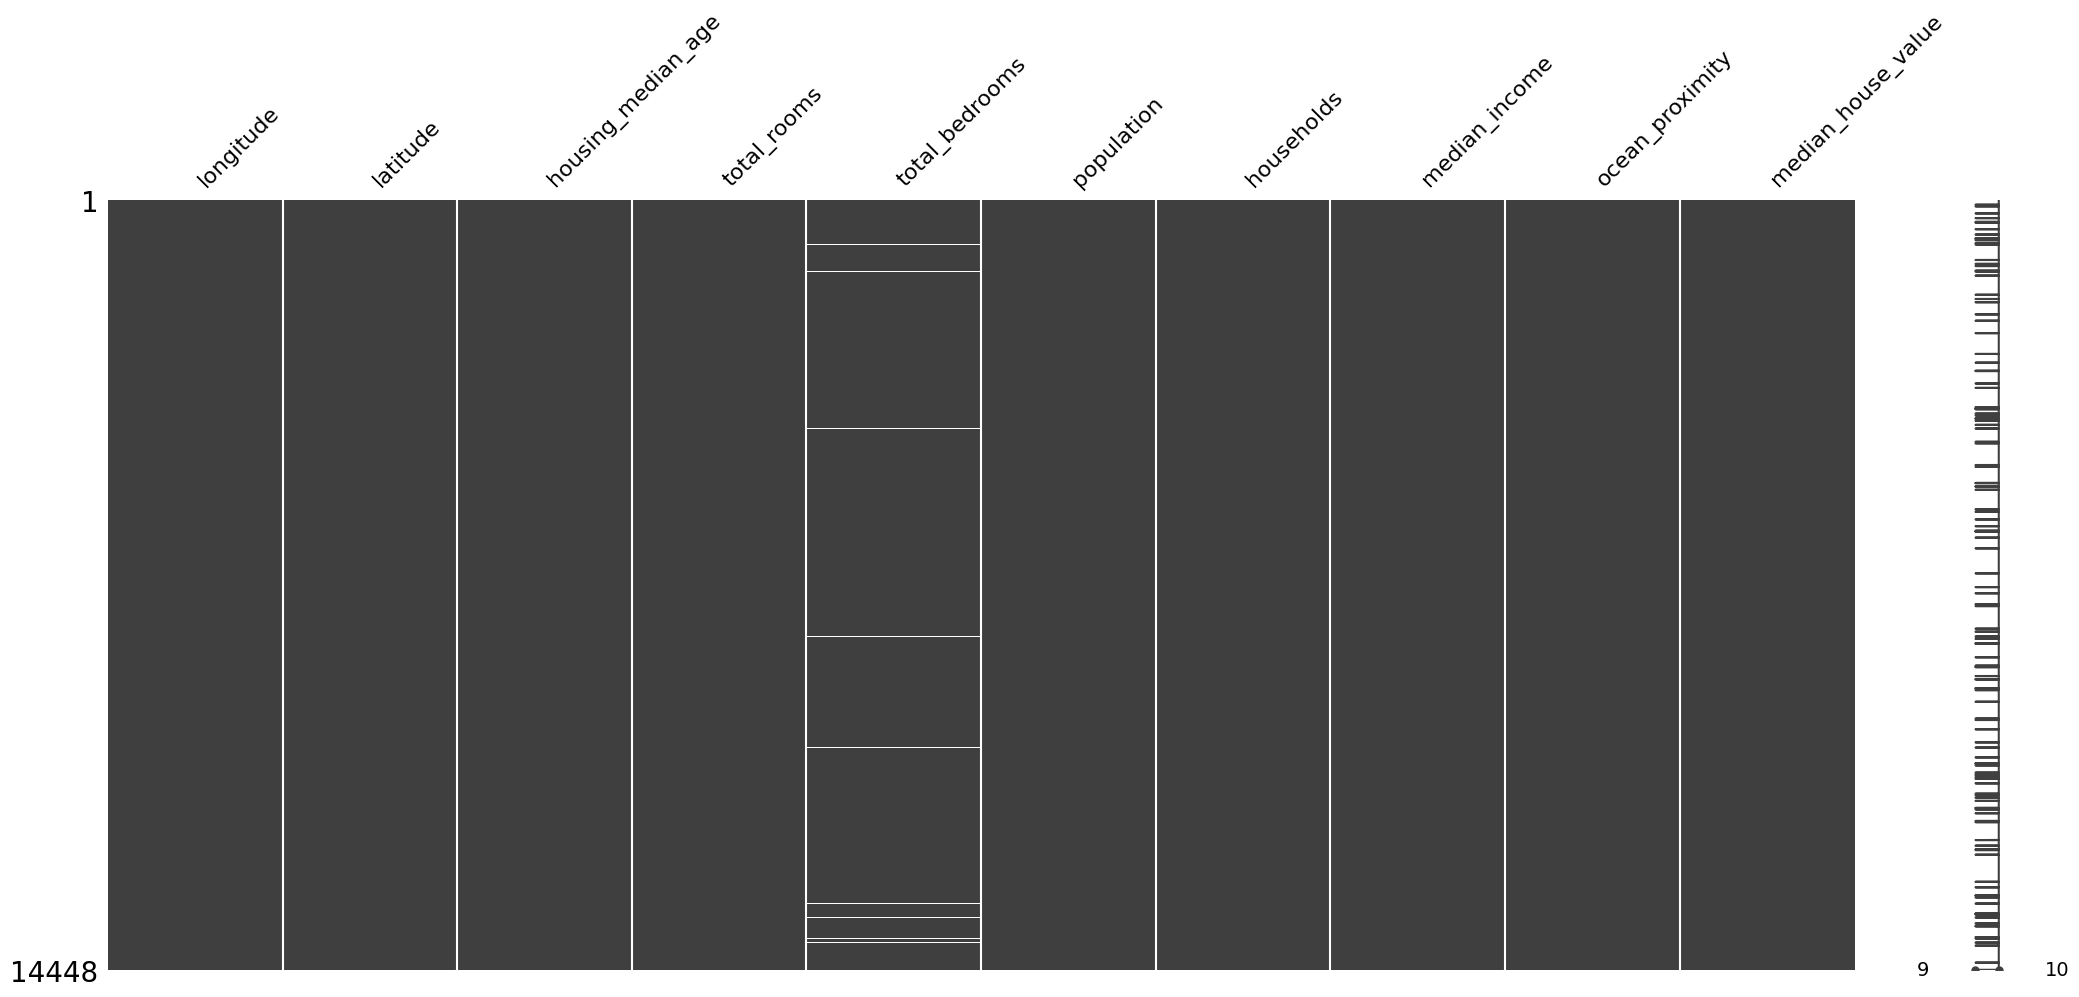

In [548]:
# Sebaran missing value dalam data

import missingno
missingno.matrix(df_house)

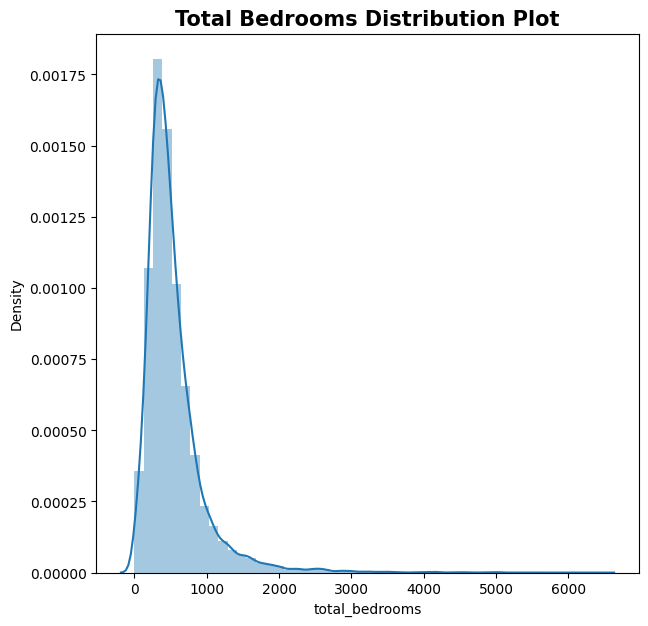

In [549]:
# Plot distribusi fitur 'total_bedrooms'
plt.figure(figsize=(7, 7))
sns.distplot(df_house['total_bedrooms'])
plt.title('Total Bedrooms Distribution Plot', size=15, weight='bold');

Dengan melihat plot distribusi dari fitur total_bedrooms yang tidak normal, maka untuk menangani missing value tersebut tidak bisa dilakukan dengan mengisinya menggunakan mean. Selain itu, persentase missing valuenya sangat kecil yaitu 0.95%. Oleh karena itu missing value tersebut akan dihapus karena jumlahnya yang sedikit dan tidak akan menghilangkan banyak data aktual, sehingga tidak akan mempengaruhi model machine learning secara signifikan nantinya.

In [550]:
# Menghapus missing value
df_house.dropna(inplace=True)

In [551]:
# Pengecekan kembali missing value
df_house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [552]:
#Jumlah baris data
df_house.shape[0]

14311

Setelah dilakukan penghapusan dan pengecekan kembali data, sudah tidak ada lagi missing value di dalam dataset yang akan digunakan dalam tahapan selanjutnya. Dataset sekarang memiliki 10 kolom dan 14311 baris data.

In [553]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_house.columns if ((df_house[feature].dtypes != 'object'))] 
df_house[num_features].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Semua nilai pada fitur bernilai positif (pengecualian untuk fitur longitude) dan tidak ada nilai yang dirasa tidak masuk akal berdasarkan deskriptif statistik fitur numerikal di atas.

### Data Correlation

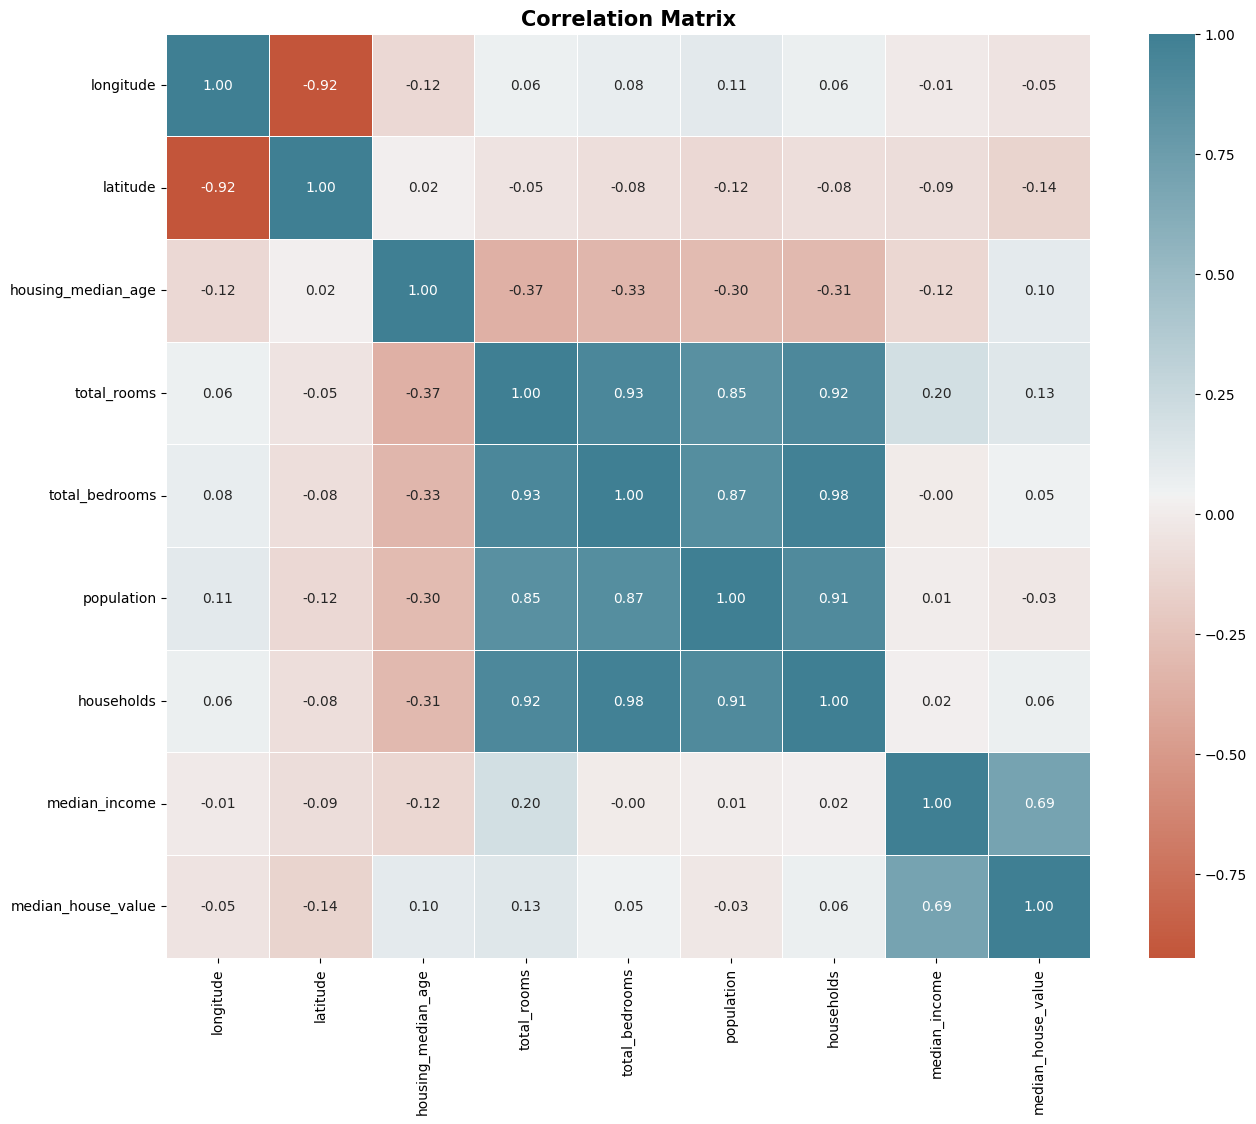

In [554]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_house.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa median_income memiliki korelasi posisitif yang cukup kuat terhadap median_house_value, artinya semakin besar nilai median_income maka semakin besar pula nilai median_house_valuenya. Sedangkan untuk fitur-fitur yang lain tidak memiliki korelasi yang cukup kuat dengan median_house_value.

### Outliers Detection

Banyaknya outliers pada data dapat memengaruhi hasil analisis dan pemodelan machine learning. Ada beberapa hal yang perlu diperhatikan sebelum melakukan treatment yang sesuai terhadap data, di antaranya adalah domain knowledge.

<Axes: >

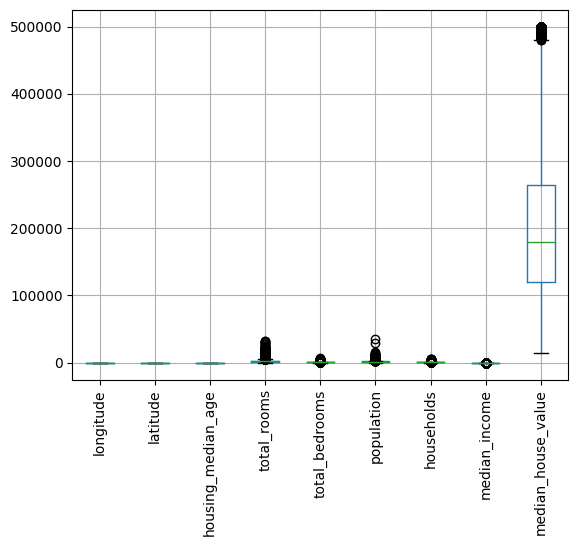

In [555]:
# Plot boxplot untuk mengecek outliers
df_house.boxplot(rot=90)

Dari boxplot di atas, terlihat bahwa terdapat outliers pada beberapa fitur dalam data yaitu total_rooms, total_bedrooms, population, households, median_income, dan median_house_value. Selanjutnya akan dilihat jumlah outliers dari masing-masing fitur tersebut dan mempertimbangkan treatment yang akan dilakukan untuk mengatasi outliers tersebut. 

In [556]:
# Membuat fungsi untuk mengecek outliers
def check_outlieurs(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')   

In [557]:
# Outliers pada fitur total_rooms
check_outlieurs(df_house['total_rooms'])

IQR: 1690.0
limit_bawah: -1083.0
limit_atas: 5677.0


In [558]:
# Outliers pada fitur total_bedrooms
check_outlieurs(df_house['total_bedrooms'])

IQR: 352.0
limit_bawah: -233.0
limit_atas: 1175.0


In [559]:
# Outliers pada fitur population
check_outlieurs(df_house['population'])

IQR: 938.0
limit_bawah: -623.0
limit_atas: 3129.0


In [560]:
# Outliers pada fitur households
check_outlieurs(df_house['households'])

IQR: 324.5
limit_bawah: -207.75
limit_atas: 1090.25


In [561]:
# Outliers pada fitur median_income
check_outlieurs(df_house['median_income'])

IQR: 2.1667000000000005
limit_bawah: -0.6806500000000009
limit_atas: 7.986150000000001


In [562]:
# Outliers pada fitur median_house_value
check_outlieurs(df_house['median_house_value'])

IQR: 144350.0
limit_bawah: -97125.0
limit_atas: 480275.0


Selanjutnya akan dilakukan feature engineering terhadap fitur numerikal

#### total_rooms

In [563]:
# Cek deskriptif statistik kolom total_rooms
df_house['total_rooms'].describe()

count    14311.000000
mean      2640.917686
std       2197.192896
min          2.000000
25%       1452.000000
50%       2125.000000
75%       3142.000000
max      32627.000000
Name: total_rooms, dtype: float64

In [564]:
# Cek total_rooms > 5677.0
df_house[df_house['total_rooms'] > 5677.0].count()['total_bedrooms']

905

Berdasarkan deskriptif statistik di atas, terlihat bahwa 75% data pada kolom total_rooms nilainya dibawah 3142, sedangkan nilai maksimalnya 32627. Kemudian berdasarkan batas atas IQR (5677), terdapat 905 data dari fitur total_rooms yang termasuk ke dalam outlier, namun outlier ini tidak dihapus karena setiap rumah dalam satu blok perumahan akan memiliki total ruangan yang banyak dengan jumlah yang berbeda beda.

Text(0.5, 1.0, 'Total Rooms')

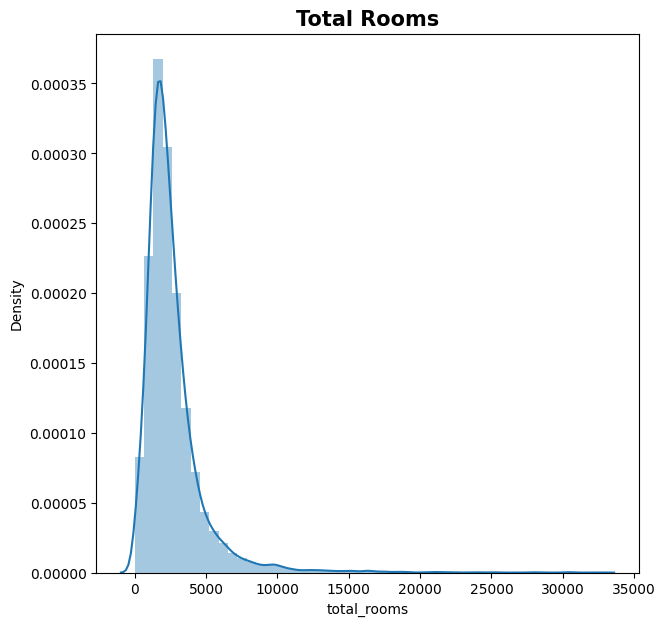

In [565]:
# Plot distribusi data 
plt.figure(figsize=(7, 7))
sns.distplot(df_house['total_rooms'])
plt.title('Total Rooms', size=15, weight='bold')



#### total_bedrooms

In [566]:
# Cek deskriptif statistik kolom total_bedrooms
df_house['total_bedrooms'].describe()

count    14311.000000
mean       538.260709
std        423.577544
min          1.000000
25%        295.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [567]:
# Cek total_bedrooms > 1175.0
df_house[df_house['total_bedrooms'] > 1175.0].count()['total_bedrooms']

879

Berdasarkan batas atas IQR (1175), terdapat 879 data dari kolom total_bedrooms yang termasuk outlier. Data outlier tersebut tidak akan dihapus dengan pertimbangan bahwa setiap rumah akan memiliki jumlah kamar yang berbeda-beda. Semakin besar rumah dan semakin banyak jumlah orang yang tinggal maka kemungkinan jumlah kamarnya semakin banyak.

Text(0.5, 1.0, 'Total Bedrooms')

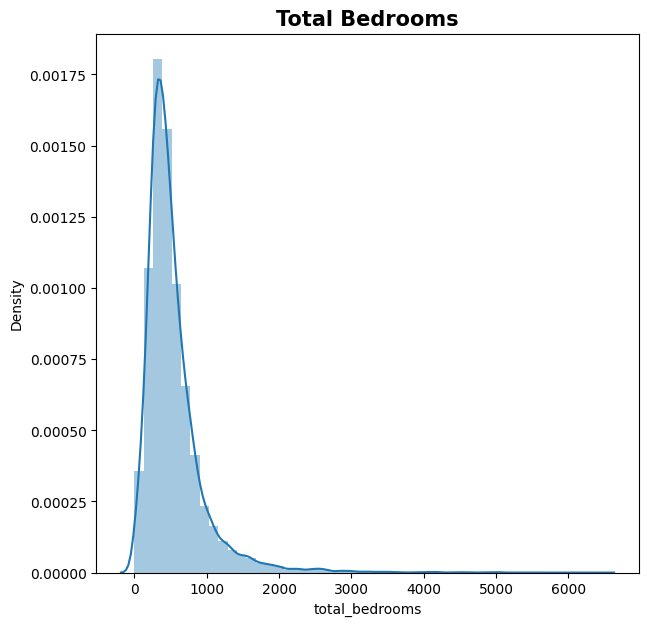

In [568]:
# Plot distribusi data 
plt.figure(figsize=(7, 7))
sns.distplot(df_house['total_bedrooms'])
plt.title('Total Bedrooms', size=15, weight='bold')

#### population

In [569]:
# Cek deskriptif statistik kolom population
df_house['population'].describe()

count    14311.000000
mean      1424.772273
std       1151.795857
min          3.000000
25%        784.000000
50%       1164.000000
75%       1722.000000
max      35682.000000
Name: population, dtype: float64

In [570]:
# Cek population > 3129.0
df_house[df_house['population'] > 3129.0].count()['population']

822

Berdasarkan batas atas IQR (3129), terdapat 822 data dari kolom population yang termasuk outlier. Data outlier tersebut tidak akan  dihapus karena pertimbangan jumlah orang yang tinggal disuatu blok perumahan berbeda beda. Pertimbangan lain jika lingkungan perumahan elit maka populasi  disana akan lebih sedikit dibandingkan populasi di perumahan biasa.

Text(0.5, 1.0, 'Population')

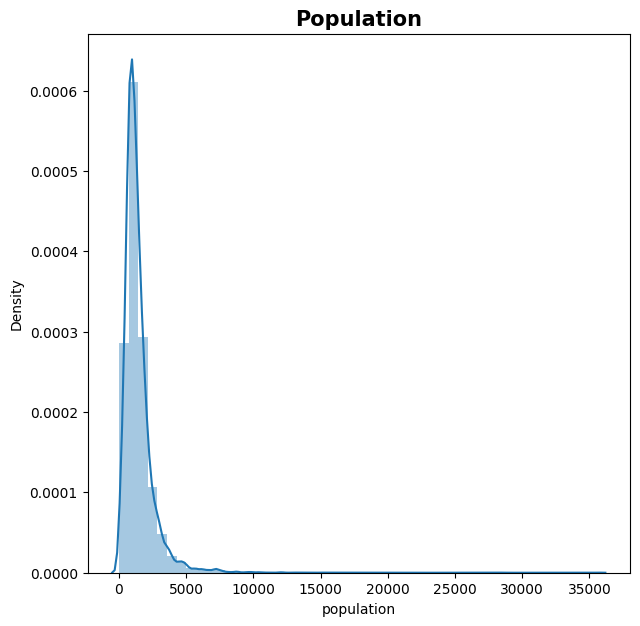

In [571]:
# Plot distribusi data 
plt.figure(figsize=(7, 7))
sns.distplot(df_house['population'])
plt.title('Population', size=15, weight='bold')

#### households

In [572]:
# Cek deskriptif statistik kolom households
df_house['households'].describe()

count    14311.000000
mean       499.480470
std        383.826005
min          1.000000
25%        279.000000
50%        410.000000
75%        603.500000
max       6082.000000
Name: households, dtype: float64

In [573]:
# Cek households > 1090.25
df_house[df_house['households'] > 1090.25].count()['households']

836

Berdasarkan batas atas IQR (1090.25), terdapat 836 data dari kolom households yang termasuk outlier. Data outlier tersebut juga tidak akan dihapus karena jumlah rumah tangga dalam 1 blok perumahan berbeda beda dan tidak bisa di batasi. 

Text(0.5, 1.0, 'Households')

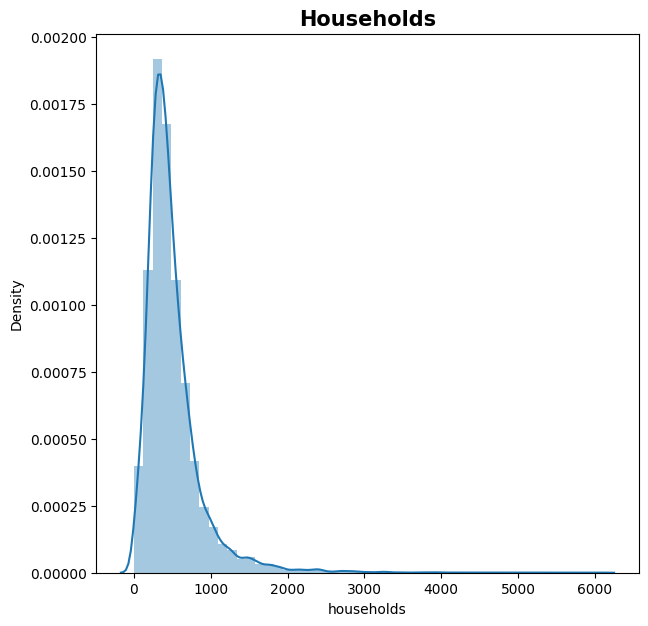

In [574]:
# Plot distribusi data 
plt.figure(figsize=(7, 7))
sns.distplot(df_house['households'])
plt.title('Households', size=15, weight='bold')

#### median_income

In [575]:
# Cek deskriptif statistik kolom median_income
df_house['median_income'].describe()

count    14311.000000
mean         3.866774
std          1.890866
min          0.499900
25%          2.569400
50%          3.540300
75%          4.736100
max         15.000100
Name: median_income, dtype: float64

In [576]:
# Cek median_income > 7.986150000000001
df_house[df_house['median_income'] > 7.986150000000001].count()['median_income']

477

Berdasarkan batas atas IQR (7.98), terdapat 477 data dari kolom median_income yang termasuk outlier, namun data outlier tersebut  tidak akan dihapus karena penghasilan orang dalam setiap blok perumahan berbeda-beda dan dapat menggambarkan kawasan perumahan tersebut. Umumnya orang-orang yang memiliki pendadapatan besar akan tinggal di perumahan mewah.

Text(0.5, 1.0, 'Median Income')

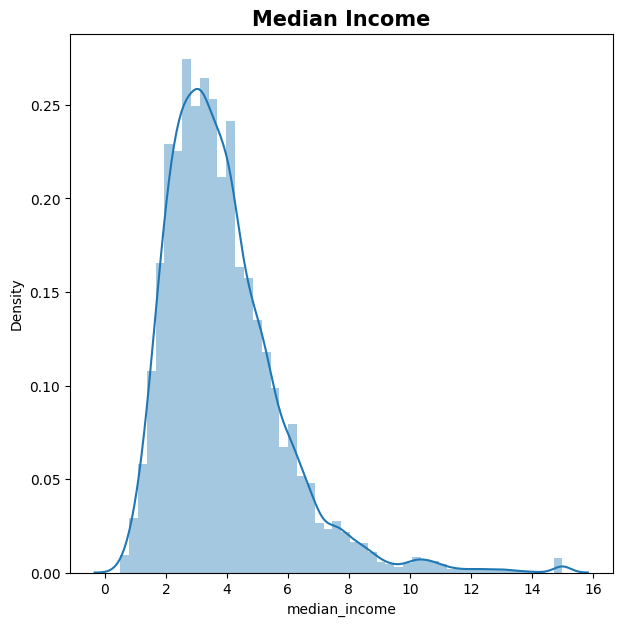

In [577]:
# Plot distribusi data 
plt.figure(figsize=(7, 7))
sns.distplot(df_house['median_income'])
plt.title('Median Income', size=15, weight='bold')

#### median_house_value

In [578]:
# Cek deskriptif statistik kolom median_house_value
df_house['median_house_value'].describe()

count     14311.000000
mean     206793.156942
std      115404.371629
min       14999.000000
25%      119400.000000
50%      180000.000000
75%      263750.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [579]:
# Cek median_house_value > 480275.0
df_house[df_house['median_house_value'] > 480275.0].count()['median_house_value']

751

Berdasarkan batas atas IQR (480275), terdapat 751 data median_house_value yang termasuk ke dalam outlier. Data outlier tersebut akan dihapus karena median_house_value merupakan target analisis prediktif sehingga harus meminimalisir bias. Hal ini akan menjadi limitasi untuk model yang akan dibuat.

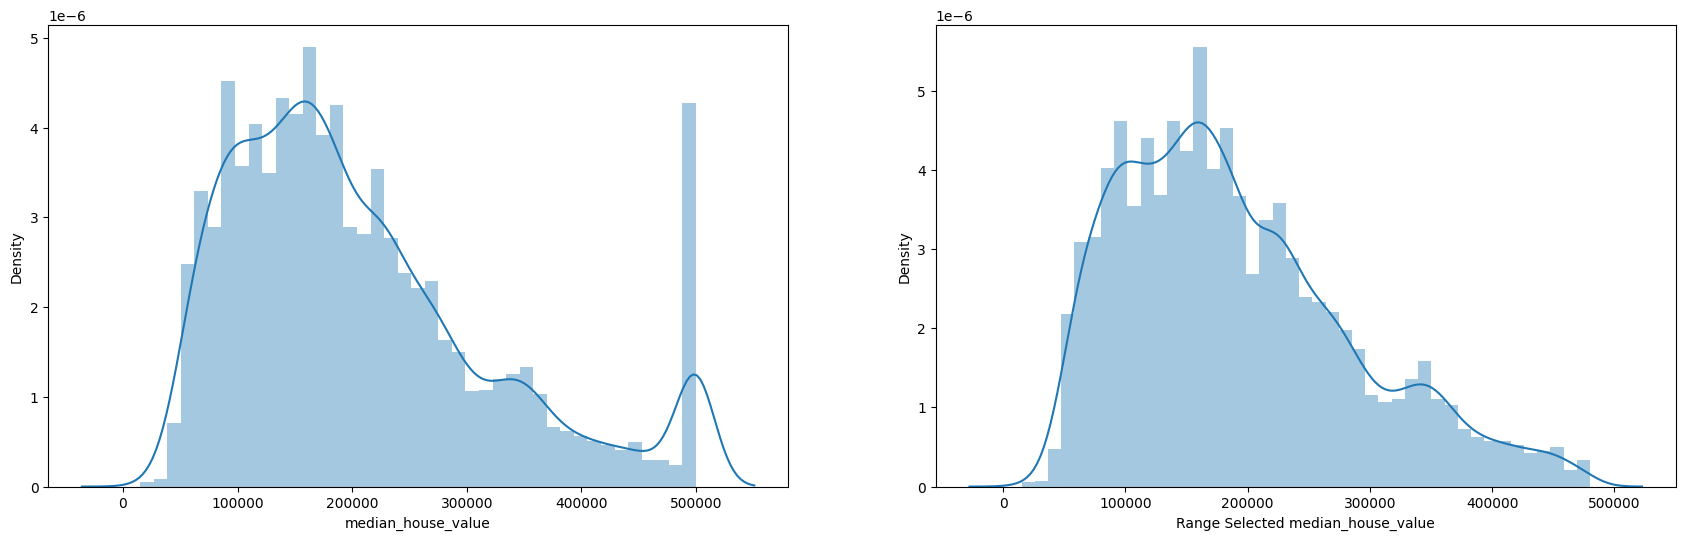

In [580]:
# Melakukan filtering pada data
df_house = df_house[(df_house['median_house_value'] <= 480275.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_house['median_house_value'], ax=axes[1])
axes[0].set_xlabel('median_house_value')
axes[1].set_xlabel('Range Selected median_house_value');

In [581]:
# Cek deskriptif statistik kolom median_house_value setelah filtering
df_house['median_house_value'].describe()

count     13560.000000
mean     190602.086799
std       95180.551359
min       14999.000000
25%      116200.000000
50%      173350.000000
75%      246000.000000
max      480100.000000
Name: median_house_value, dtype: float64

Pada awalnya harga tertinggi rumah (median_house value) adalah 500001 USD. Setelah dilakukan penghapusan pada outlier, nilai tertingginya menjadi 480100 USD. 

### Clean Dataset

In [582]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [583]:
# Cek info kembali dasaet
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13560 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13560 non-null  float64
 1   latitude            13560 non-null  float64
 2   housing_median_age  13560 non-null  float64
 3   total_rooms         13560 non-null  float64
 4   total_bedrooms      13560 non-null  float64
 5   population          13560 non-null  float64
 6   households          13560 non-null  float64
 7   median_income       13560 non-null  float64
 8   ocean_proximity     13560 non-null  object 
 9   median_house_value  13560 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [584]:
# Jumlah baris data
df_house.shape[0]

13560

Setelah dilakukan feature engineering pada fitur numerik, tersisa 13560 baris data yang akan digunakan dalam pemodelan. Itu artinya hanya sekitar 5,2% data yang dieliminasi sesuai dengan asumsi dan argumen yang digunakan pada proses sebelumnya

### Modeling

In [585]:
# Library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

#### Encoding dan Scaling

Sebelum melakukan splitting data, fitur kategorikal dalam dataset yaitu ocean_proximity akan diubah terlebih dahulu menjadi numerik menggunakan one hot encoding. Selain itu, untuk fitur numerikal akan dilakukan scaling menggunakan standard scaler untuk normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang sangat besar.

In [586]:
# variabel kategorik untuk dilakukan one hot encoding
one_hot_var = ['ocean_proximity']

# variabel numerik untuk di scalling menggunakan standard scaler
scaling_var = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# variabel berisikan pipeline untuk encoding
one_hot_encoding = Pipeline([('encoding_onehotencoding',OneHotEncoder(drop='first', handle_unknown='ignore'))])

# variabel berisikan pipeline untuk scaling
scaling = Pipeline(steps=[('scaling',StandardScaler(with_mean=False))])

# Menggabungkan pipeline encoding dan pipeline scaling
transformer = ColumnTransformer([
        ('transformation_categorical', one_hot_encoding, one_hot_var),
        ('transformation_numerical', scaling, scaling_var)],remainder='passthrough')

#### Data Splitting

In [587]:
# Memisahkan data independen variabel dengan target
x = df_house.drop(['median_house_value'], axis=1)
y = df_house['median_house_value']

#### Train and Test Splitting

In [588]:
# Splitting data training dan test dengan proporsi 70:30
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,  
    test_size=0.3,
    random_state=42)

#### Choose a Benchmark Model

In [589]:
# Define algoritma yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

In [590]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

In [591]:
# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]


# Menyimpan nilai MAE
score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

# Menyimpan nilai MAPE
score_mape = []
nilai_mean_mape = []
nilai_std_mape = []


# Mencari algoritma terbaik dalam tahap train
for i in models:
    
    # Mengevaluasi performa model
    crossval = KFold(n_splits=5, shuffle=True, random_state=42) 


    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])


    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error',  
        error_score='raise' 
        ) 

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())


    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise' 
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-43040.6495252  -42425.1029874  -41375.36046761 -44037.57697257
 -43600.54859341] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.24091279 -0.24336766 -0.24223464 -0.24245066 -0.25259811] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-37243.77561346 -36500.18354606 -35809.16669751 -38185.42449086
 -36655.32878195] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.20279953 -0.20330888 -0.20305194 -0.20526941 -0.2139196 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-43205.37124803 -41699.63191153 -41027.028451   -43527.60800843
 -44031.77081138] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                  

In [592]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-42895.847709,933.230803,-0.244313,0.004216
1,KNN Regressor,-36878.775826,797.230200,-0.205670,0.004216
2,DecisionTree Regressor,-42698.282086,1141.359187,-0.244493,0.008969
3,RandomForest Regressor,-30996.961569,652.838242,-0.174634,0.005542
4,XGBoost Regressor,-29947.200989,948.152987,-0.169561,0.006721


Berdasarkan evaluasi hasil dari lima model yang diuji, dilihat dari nilai MAE dan MAPE yang paling kecil, XGBoost adalah model terbaik. Selanjutnya, akan dilakukan prediksi pada test set dengan benchmark model terbaik, yaitu XGBoost. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost

In [593]:
# Benchmark model terbaik
models = {
    'XGBoost': XGBRegressor(random_state=42)
}

score_mae = []
score_mape = []

## Melakukan prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,MAE,MAPE
XGBoost,29341.991996,0.175416


Setelah dilakukan prediksi pada data testing, XGBoost memiliki nilai MAE dan MAPE yang cukup kecil. XGBoost akan dipilih sebagai model akhir dan akan dilakukan Hyperparameter Tuning untuk meningkatkan performanya.

## Hyperparameter Tuning

In [594]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

## Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))


## Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [595]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
parameter_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error',
    random_state = 42
)

In [596]:
# Fitting data training untuk mencari parameter terbaik
parameter_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('transformation_categorical',
                                                                               Pipeline(steps=[('encoding_onehotencoding',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['ocean_proximity']),
                                                                              ('transformation_numerical',
                                                                               Pipel...
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [597]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAE & MAPE
pd.DataFrame(parameter_xgb.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
39,4.871234,0.027876,0.093323,0.017131,0.6,0.059948,141,10,0.03,10,...,615.657140,1,-0.169750,-0.175868,-0.170313,-0.172156,-0.186214,-0.174860,0.006067,1
26,3.081361,0.204379,0.049642,0.014439,0.4,1.29155,100,7,0.06,1,...,749.813529,2,-0.181604,-0.185965,-0.180851,-0.183488,-0.201228,-0.186627,0.007511,2
18,3.420004,0.069058,0.063543,0.012788,0.2,0.059948,193,8,0.08,4,...,808.603896,3,-0.181037,-0.187620,-0.182949,-0.186209,-0.207618,-0.189086,0.009553,3
9,1.818086,0.136971,0.031447,0.004392,0.9,0.059948,105,5,0.38,3,...,723.734931,4,-0.186227,-0.191715,-0.192152,-0.195318,-0.207771,-0.194636,0.007189,5
31,1.722895,0.061178,0.032830,0.008568,0.9,10.0,176,3,0.48,3,...,784.538807,5,-0.191920,-0.191908,-0.193691,-0.191561,-0.212375,-0.196291,0.008076,6


In [598]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', parameter_xgb.best_score_)
print('Best_params:', parameter_xgb.best_params_)

XGBoost
Best_score: -0.17486029404023823
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 141, 'model__max_depth': 10, 'model__learning_rate': 0.03, 'model__gamma': 10, 'model__colsample_bytree': 0.6}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [599]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=42)}

# Define model terhadap estimator terbaik
xgb_tuning = parameter_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE
XGB,29154.068443,0.16986


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [600]:
# Sebelum hyperparameter tuning
score_before_tuning

,MAE,MAPE
XGBoost,29341.991996,0.175416


In [601]:
# Setelah hyperparameter tuning
score_after_tuning

,MAE,MAPE
XGB,29154.068443,0.16986


Setelah dilakukan hyperparameter tuning, nilai MAE dan MAPE berkurang, hal ini menunjukkan bahwa performa model mengalami peningkatan walaupun sedikit.

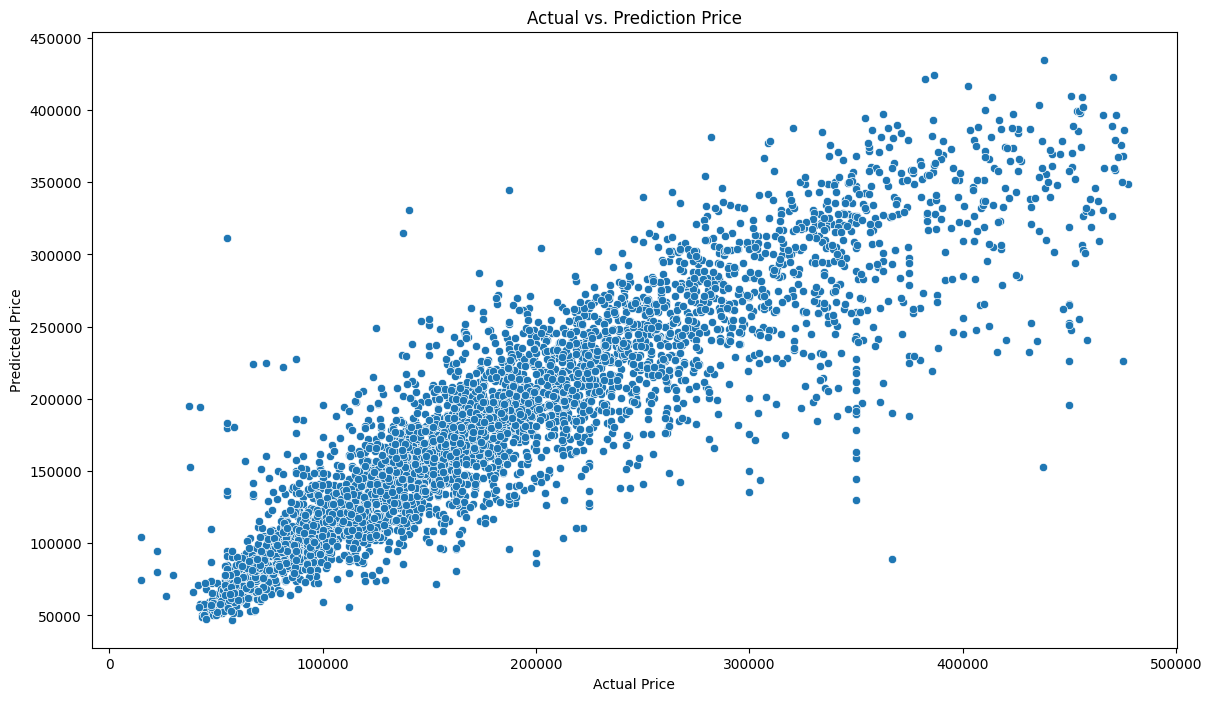

In [602]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

Berdasarkan plot di atas dapat dilihat bahwa harga aktual dengan harga yang di prediksi membentuk pola yang linear walaupun masih terdapat error seperti harga aktual yang rendah namun diprediksi harga tinggi dan sebaliknya. Nilai MAPE yang didapat adalah 16,9% dimana menurut Lewis, C. D. (1982) model dapat dikategorikan baik karena memiliki nilai MAPE dalam rentang 10%-20%

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

#### Feature Importance

Untuk mengetahui fitur-fitur yang sangat memengaruhi target harga rumah (median_house_value), dapat dilihat dengan menggunakan function feature_importances_.

<Axes: title={'center': 'Feature Importances'}>

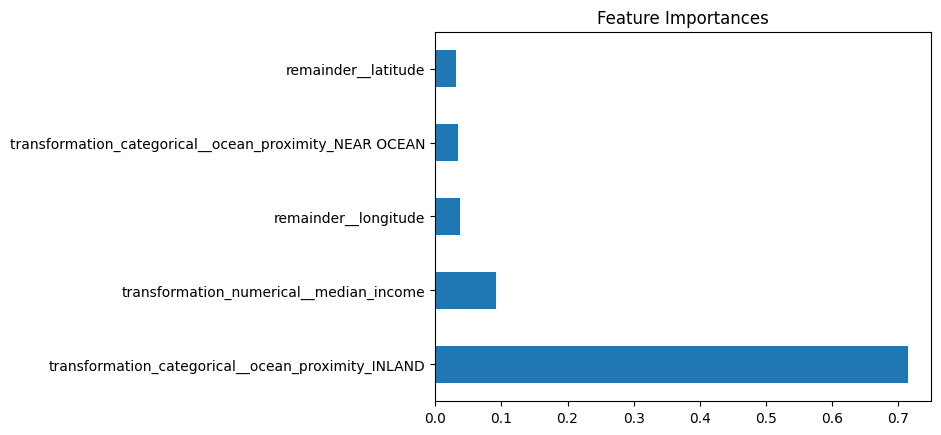

In [603]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances')

# Kesimpulan

Berdasarkan pemodelan yang telah dilakukan dapat disimpulkan :
* XGBoost memiliki nilai MAE dan MAPE paling kecil mendekati nol sehingga dipakai sebagai model akhir untuk melakukan prediksi harga rumah.

* Fitur yang paling berpengaruh terhadap penentuan harga rumah (median_house_value) adalah fitur ocean_proximity dan median_income.

* Nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning adalah ~16,9%. Jika model yang telah dibuat ini digunakan untuk memperkirakan harga rumah baru di California pada rentang nilai seperti yang dilatih terhadap   
  model (maksimal harga 480100 USD), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 16,9% dari harga seharusnya. Namun, tidak menutup kemungkinan juga prediksinya akan meleset lebih jauh karena adanya bias yang dihasilkan model jika dilihat dari visualisasi antara harga aktual dan prediksi, selain itu dataset yang digunakan dalam melatih model adalah data dari tahun 1990.


# Rekomendasi

Hal-hal yang dapat dilakukan untuk meningkatkan model agar menjadi lebih baik lagi :
* Mengecek prediksi mana saja yang memiliki nilai error yang tinggi, variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi. Kemudian bisa dilakukan training ulang dengan menggunakan feature engineering lainnya.

* Melakukan penambahan fitur yang lebih korelatif dengan target ('median_house_value'), seperti luas tanah, luas bangunan, fasilitas rumah, jarak ke pusat kota dan fasilitas umum, serta fitur lainnya.

* Untuk memperoleh hasil yang maksimal pada model, tidak disarankan menggunakan data perumahan yang harganya diatas 480100 US Dollar karena akan berisiko memiliki error yang sangat tinggi dan harga tersebut merupakan limitasi untuk model yang telah dibangun.


## Save Model

In [604]:
#Saving Model
import pickle


estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(x_train, y_train)

pickle.dump(estimator, open('California-Housing-Price-XGB.sav', 'wb'))